# PLN project - Data Understanding

This is the first part of the PLN data mining project. In this notebook, you will find the process of data understanding. 

## Import of the needed packages

In [1]:
#All of the needed packages will be imported here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read files
The first step to perform the analysis is to proper read the data files.

In [2]:
arxiv = pd.read_csv('ArXiv-10/arxiv100.csv', sep=",")

Without a further treatment, a problem arises. The dates are being treated as numbers. For this reason, it is needed to do something more complex than the default readers from pandas. 

## Analysis of the dataset

In [3]:
arxiv.head()

,title,abstract,label
0,The Pre-He White Dwarfs in Eclipsing Binaries....,We report the first $BV$ light curves and hi...,astro-ph
1,A Possible Origin of kHZ QPOs in Low-Mass X-ra...,A possible origin of kHz QPOs in low-mass X-...,astro-ph
2,The effects of driving time scales on heating ...,Context. The relative importance of AC and D...,astro-ph
3,A new hard X-ray selected sample of extreme hi...,Extreme high-energy peaked BL Lac objects (E...,astro-ph
4,The baryon cycle of Seven Dwarfs with superbub...,"We present results from a high-resolution, c...",astro-ph


In [4]:
arxiv.describe

<bound method NDFrame.describe of                                                    title  \
0      The Pre-He White Dwarfs in Eclipsing Binaries....   
1      A Possible Origin of kHZ QPOs in Low-Mass X-ra...   
2      The effects of driving time scales on heating ...   
3      A new hard X-ray selected sample of extreme hi...   
4      The baryon cycle of Seven Dwarfs with superbub...   
...                                                  ...   
99995  Semiparametric estimation for space-time max-s...   
99996  A spatial causal analysis of wildland fire-con...   
99997               Neural Conditional Event Time Models   
99998  Efficient Estimation of COM-Poisson Regression...   
99999  algcomparison: Comparing the Performance of Gr...   

                                                abstract     label  
0        We report the first $BV$ light curves and hi...  astro-ph  
1        A possible origin of kHz QPOs in low-mass X-...  astro-ph  
2        Context. The relative importa

<AxesSubplot:xlabel='label', ylabel='count'>

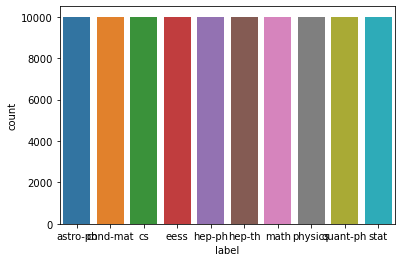

In [5]:
sns.countplot(x = arxiv['label'])

In [6]:
arxiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   title     100000 non-null  object
 1   abstract  100000 non-null  object
 2   label     100000 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


## Data pre-processing

### Cleanup and normalization

Removing non-alphabetic chars

In [7]:
import re

corpus = []
for i in range(0, arxiv['abstract'].size):
    # get abstracts and remove non alpha chars
    article = re.sub('[^a-zA-Z]', ' ', arxiv['abstract'][i])
    # add article's abstract to corpus
    corpus.append(article)

print(corpus[:3])

['  We report the first  BV  light curves and high resolution spectra of the post mass transfer binary star WASP         to study the absolute properties of extremely low mass white dwarfs  From the observed spectra  the double lined radial velocities were derived  and the effective temperature and rotational velocity of the brighter  more massive primary were found to be  T   rm eff              pm      K and  v   sin  i         pm     km s         respectively  The combined analysis of the   it TESS  archive data and ours yielded the accurate fundamental parameters of the program target  The masses were derived to about        accuracy and the radii to         or better  The secondary component s parameters of  M            pm        M   odot    R            pm        R   odot    T   rm eff                pm      K  and  L          pm      L   odot  are in excellent agreement with the evolutionary sequence for a helium core white dwarf of mass       M   odot   and indicates that this

Lowercasing

In [8]:
corpus_lowercase = [sentence.lower() for sentence in corpus]
print(corpus_lowercase[:3])

['  we report the first  bv  light curves and high resolution spectra of the post mass transfer binary star wasp         to study the absolute properties of extremely low mass white dwarfs  from the observed spectra  the double lined radial velocities were derived  and the effective temperature and rotational velocity of the brighter  more massive primary were found to be  t   rm eff              pm      k and  v   sin  i         pm     km s         respectively  the combined analysis of the   it tess  archive data and ours yielded the accurate fundamental parameters of the program target  the masses were derived to about        accuracy and the radii to         or better  the secondary component s parameters of  m            pm        m   odot    r            pm        r   odot    t   rm eff                pm      k  and  l          pm      l   odot  are in excellent agreement with the evolutionary sequence for a helium core white dwarf of mass       m   odot   and indicates that this

Removing stopwords

In [9]:
from nltk.corpus import stopwords

english_stopwords = stopwords.words('english')

def remove_stopwords(sentence):
    # remove stopwords
    cleaned_sentence = [word for word in sentence.split() if word not in english_stopwords]
    return ' '.join(cleaned_sentence)

corpus_no_stopwords = [remove_stopwords(sentence) for sentence in corpus_lowercase]

print(f"Corpus original size: {sum(map(len, corpus_lowercase))}")
print(f"Corpus size after removing stopwords: {sum(map(len, corpus_no_stopwords))}")

print(corpus_no_stopwords[:3])

Corpus original size: 105710563
Corpus size after removing stopwords: 79349182
['report first bv light curves high resolution spectra post mass transfer binary star wasp study absolute properties extremely low mass white dwarfs observed spectra double lined radial velocities derived effective temperature rotational velocity brighter massive primary found rm eff pm k v sin pm km respectively combined analysis tess archive data yielded accurate fundamental parameters program target masses derived accuracy radii better secondary component parameters pm odot r pm r odot rm eff pm k l pm l odot excellent agreement evolutionary sequence helium core white dwarf mass odot indicates star halfway constant luminosity phase results presented article demonstrate wasp el cvn eclipsing binary thin disk formed stable roche lobe overflow channel composed main sequence dwarf spectral type pre white dwarf', 'possible origin khz qpos low mass x ray binaries proposed recent numerical mhd simulations accret

Stemming

In [10]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
def stemming(sentence):
    # stemming
    stemmed_sentence = [stemmer.stem(word) for word in sentence.split()]
    return ' '.join(stemmed_sentence)

corpus_stem = [stemming(sentence) for sentence in corpus_no_stopwords]

words_before = ' '.join(corpus_no_stopwords)
words_before = words_before.split()
words_before = list(set(words_before))
size_corpus_before = len(words_before)
print(f"Number tokens before stemming: {size_corpus_before}")

words_after_stem = ' '.join(corpus_stem)
words_after_stem  = words_after_stem.split()
words_after_stem  = list(set(words_after_stem))
size_corpus_after_stem = len(words_after_stem)
print(f"Number tokens after stemming: {size_corpus_after_stem}")

print(corpus_stem[:3])

Number tokens before stemming: 100167
Number tokens after stemming: 72635
['report first bv light curv high resolut spectra post mass transfer binari star wasp studi absolut properti extrem low mass white dwarf observ spectra doubl line radial veloc deriv effect temperatur rotat veloc brighter massiv primari found rm eff pm k v sin pm km respect combin analysi tess archiv data yield accur fundament paramet program target mass deriv accuraci radii better secondari compon paramet pm odot r pm r odot rm eff pm k l pm l odot excel agreement evolutionari sequenc helium core white dwarf mass odot indic star halfway constant luminos phase result present articl demonstr wasp el cvn eclips binari thin disk form stabl roch lobe overflow channel compos main sequenc dwarf spectral type pre white dwarf', 'possibl origin khz qpo low mass x ray binari propos recent numer mhd simul accret disk turbul magnet field mri definit show presenc two arm spiral structur quasi steadi state accret disk deform di

In [11]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
ps = PorterStemmer()
sw = set(stopwords.words('english'))

for i in range(0, arxiv['abstract'].size):
    # get articles abstracts and remove non alpha chars
    artcl = re.sub('[^a-zA-Z]', ' ', arxiv['abstract'][i])
    # to lower-case
    artcl = artcl.lower()
    # split into tokens, apply stemming and remove stop words
    artcl = ' '.join([ps.stem(w) for w in artcl.split() if w not in sw])
    corpus.append(artcl)

print(corpus[:3])

['report first bv light curv high resolut spectra post mass transfer binari star wasp studi absolut properti extrem low mass white dwarf observ spectra doubl line radial veloc deriv effect temperatur rotat veloc brighter massiv primari found rm eff pm k v sin pm km respect combin analysi tess archiv data yield accur fundament paramet program target mass deriv accuraci radii better secondari compon paramet pm odot r pm r odot rm eff pm k l pm l odot excel agreement evolutionari sequenc helium core white dwarf mass odot indic star halfway constant luminos phase result present articl demonstr wasp el cvn eclips binari thin disk form stabl roch lobe overflow channel compos main sequenc dwarf spectral type pre white dwarf', 'possibl origin khz qpo low mass x ray binari propos recent numer mhd simul accret disk turbul magnet field mri definit show presenc two arm spiral structur quasi steadi state accret disk deform disk two arm c mode n oscil excit wave wave reson instabl among excit oscil 

In [12]:
title_corpus = []
ps = PorterStemmer()
sw = set(stopwords.words('english'))

for i in range(0, arxiv['title'].size):
    # get articles titles and remove non alpha chars
    title = re.sub('[^a-zA-Z]', ' ', arxiv['title'][i])
    # to lower-case
    title = title.lower()
    # split into tokens, apply stemming and remove stop words
    title = ' '.join([ps.stem(w) for w in title.split() if w not in sw])
    title_corpus.append(title)

print(title_corpus[:3])

['pre white dwarf eclips binari wasp', 'possibl origin khz qpo low mass x ray binari', 'effect drive time scale heat coron arcad']


### Wordclouds

['hep-th', 'math', 'eess', 'cond-mat', 'quant-ph', 'physics', 'hep-ph', 'stat', 'cs', 'astro-ph']
Wordcloud for category: hep-th


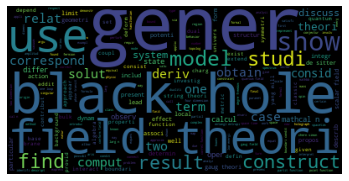

Wordcloud for category: math


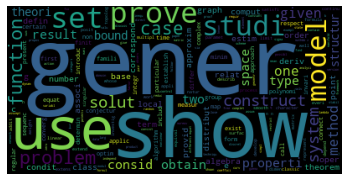

Wordcloud for category: eess


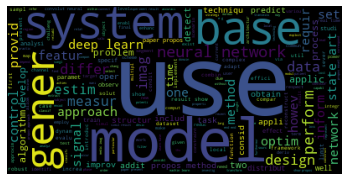

Wordcloud for category: cond-mat


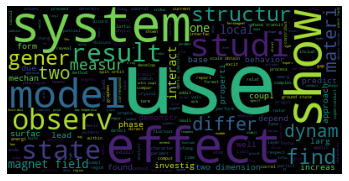

Wordcloud for category: quant-ph


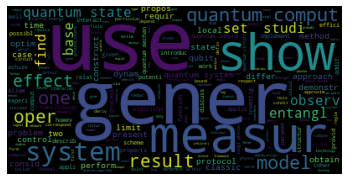

Wordcloud for category: physics


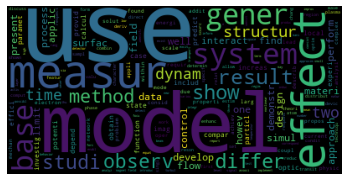

Wordcloud for category: hep-ph


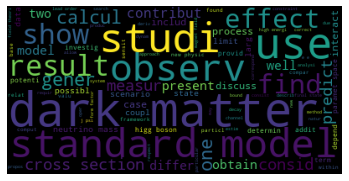

Wordcloud for category: stat


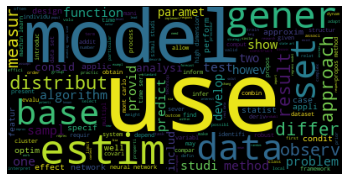

Wordcloud for category: cs


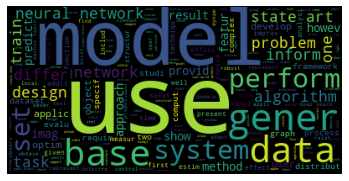

Wordcloud for category: astro-ph


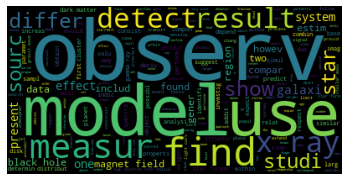

Wordcloud for titles: 



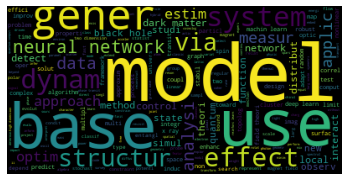

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_word_cloud(content):
    wordcloud = WordCloud().generate(" ".join(content))

    plt.figure()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

articles_categories = list(set(arxiv['label']))
print(articles_categories)

df_temp = pd.DataFrame(corpus, columns=['abstract_filtered'])

df_temp2 = pd.concat([arxiv, df_temp], axis=1)

# get abstract_filtered column values per category
for i in range(0, len(articles_categories)):
    values_per_label = df_temp2['abstract_filtered'][df_temp2['label'] == articles_categories[i]]
    print(f"Wordcloud for category: {articles_categories[i]}")
    create_word_cloud(values_per_label)

print("Wordcloud for titles: \n")
create_word_cloud(title_corpus)

Replacing the columns abstract and title by its parsed corpus, obtaining a first cleaned dataset.

In [14]:
df_temp = pd.DataFrame(title_corpus, columns=['title_filtered'])
df_parsed = pd.concat([df_temp2, df_temp], axis=1)
df_parsed.drop(['title', 'abstract'], axis=1, inplace=True)
df_parsed.head()

,label,abstract_filtered,title_filtered
0,astro-ph,report first bv light curv high resolut spectr...,pre white dwarf eclips binari wasp
1,astro-ph,possibl origin khz qpo low mass x ray binari p...,possibl origin khz qpo low mass x ray binari
2,astro-ph,context rel import ac dc heat maintain tempera...,effect drive time scale heat coron arcad
3,astro-ph,extrem high energi peak bl lac object ehbl eme...,new hard x ray select sampl extrem high energi...
4,astro-ph,present result high resolut cosmolog lambda cd...,baryon cycl seven dwarf superbubbl feedback


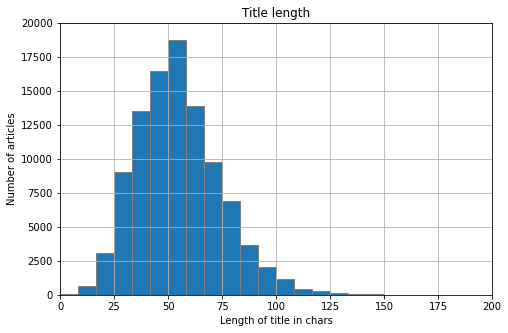

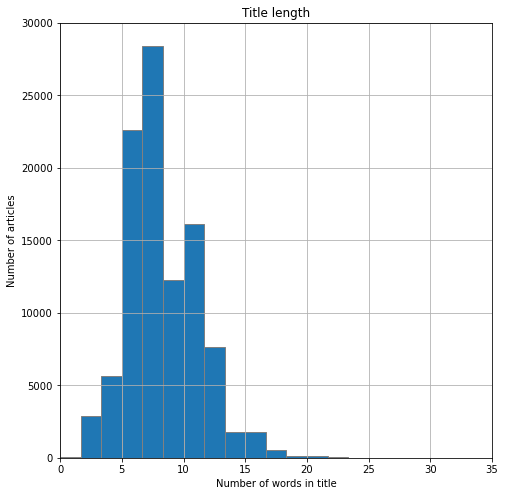

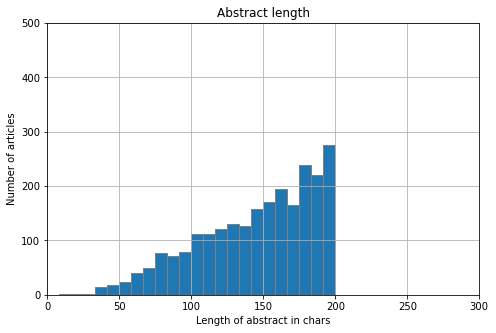

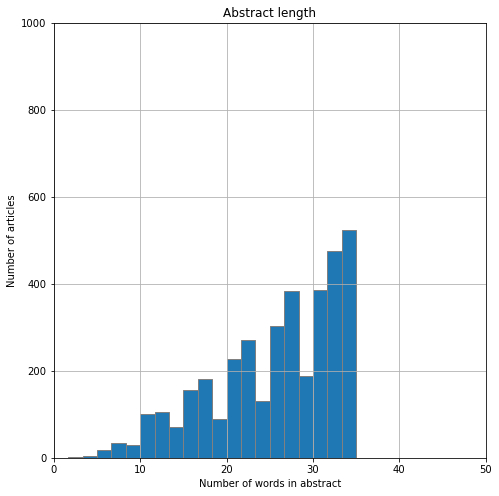

In [15]:
# HISTOGRAM PLOT - LENGTH OF TITLE IN CHARS

hist_len_title = df_parsed['title_filtered'].str.len().hist(bins=24, edgecolor='grey', range=(0, 200), figsize=(8,5))
hist_len_title.set_xlim([0, 200])
hist_len_title.set_ylim([0, 20000])
plt.title('Title length')
plt.xlabel('Length of title in chars')
plt.ylabel('Number of articles')
plt.subplots_adjust(left=0.15)
plt.show()

# HISTOGRAM PLOT - LENGTH OF TITLE IN WORDS

hist_len_words_title = df_parsed['title_filtered'].str.split().str.len().hist(bins=21, edgecolor='grey', range=(0, 35), figsize=(8,8))
hist_len_words_title.set_xlim([0, 35])
hist_len_words_title.set_ylim([0, 30000])
plt.title('Title length')
plt.xlabel('Number of words in title')
plt.ylabel('Number of articles')
plt.subplots_adjust(left=0.15)
plt.show()

# HISTOGRAM PLOT - LENGTH OF ABSTRACTS IN CHARS

hist_len_title = df_parsed['abstract_filtered'].str.len().hist(bins=24, edgecolor='grey', range=(0, 200), figsize=(8,5))
hist_len_title.set_xlim([0, 300])
hist_len_title.set_ylim([0, 500])
plt.title('Abstract length')
plt.xlabel('Length of abstract in chars')
plt.ylabel('Number of articles')
plt.subplots_adjust(left=0.15)
plt.show()

# HISTOGRAM PLOT - LENGTH OF ABSTRACTS IN WORDS

hist_len_words_title = df_parsed['abstract_filtered'].str.split().str.len().hist(bins=21, edgecolor='grey', range=(0, 35), figsize=(8,8))
hist_len_words_title.set_xlim([0, 50])
hist_len_words_title.set_ylim([0, 1000])
plt.title('Abstract length')
plt.xlabel('Number of words in abstract')
plt.ylabel('Number of articles')
plt.subplots_adjust(left=0.15)
plt.show()

<Figure size 640x480 with 0 Axes>

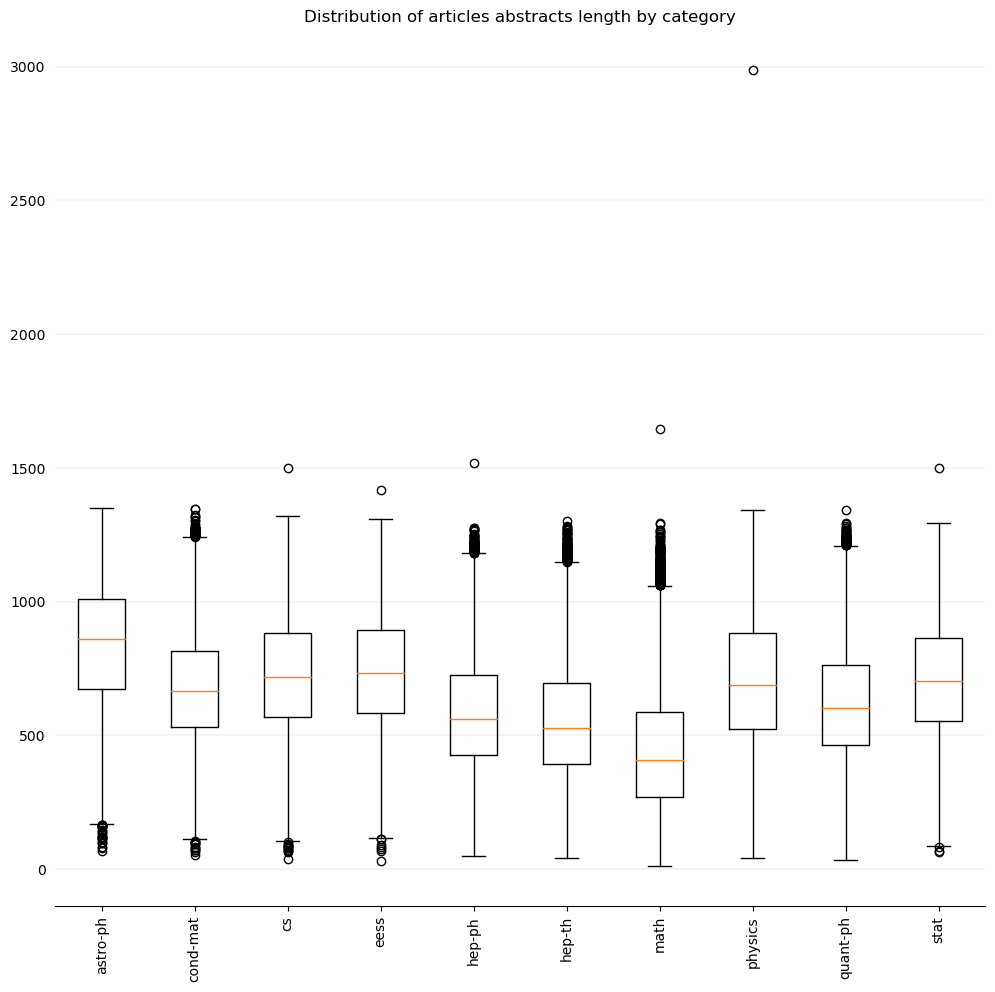

Distribution of news length summary statistics
  Publisher  Min    Mean   Max  25th percentile  Median  75th percentile  \
0  astro-ph   66  832.70  1351            673.0   860.0           1009.0   
1  cond-mat   53  684.58  1347            532.0   666.0            816.0   
2        cs   37  724.57  1498            570.0   718.0            882.0   
3      eess   31  740.69  1418            583.0   735.0            894.0   
4    hep-ph   49  584.05  1520            425.0   560.5            727.0   
5    hep-th   40  557.60  1303            392.0   529.0            695.0   
6      math   11  448.61  1647            270.0   409.0            586.0   
7   physics   41  705.64  2988            523.0   689.0            881.0   
8  quant-ph   36  623.20  1344            464.0   604.0            762.0   
9      stat   64  713.08  1499            552.0   705.0            864.0   

   Interquartile range (IQR)  
0                      336.0  
1                      284.0  
2                      

In [16]:
#-----------------------------------
#BOX PLOT - ARTICLES LENGTH (char) BY CATEGORY

#clean plot info
plt.rcParams.update(plt.rcParamsDefault)
plt.figure().clear()
plt.close()
plt.cla()
plt.clf()

category = df_parsed['label'].unique()

df_parsed['abstract_length']  = df_parsed['abstract_filtered'].str.len()

# Prepare content length by category datasets
boxplt = {}
for c in category:
    boxplt[c] = df_parsed[df_parsed['label'] == c]['abstract_length']

# Visualize abstracts length distribution for all categories
fig, ax = plt.subplots(figsize=(12, 12))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_title('Distribution of articles abstracts length by category')
# Set categories names as labels for the boxplot
dataset = boxplt.values()
labels = category
plt.xticks(rotation='vertical')
plt.subplots_adjust(bottom=0.15)
ax.boxplot(dataset, labels=labels)
plt.show()

print('Distribution of news length summary statistics')

Min = []
Mean = []
Max = []
Twentyfifthpercentile = []
Median = []
seventyfifthpercentile = []
InterquartileRange = []

import numpy as np

for dataset in boxplt.values():

    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)
    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)
    Min.append(min_value)
    Mean.append(mean)
    Max.append(max_value)
    Median.append(median)
    Twentyfifthpercentile.append(quartile_1)
    seventyfifthpercentile.append(quartile_3)
    InterquartileRange.append(iqr)
    

length_per_category_statistics = pd.DataFrame({'Publisher' : category, 
                                            'Min' : Min,
                                            'Mean' : Mean,
                                            'Max' : Max,
                                            '25th percentile' : Twentyfifthpercentile,
                                            'Median' : Median,
                                            '75th percentile' : seventyfifthpercentile,
                                            'Interquartile range (IQR)' : InterquartileRange})

print(length_per_category_statistics)

### Obtaining features from the Bag-of-Words model

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus).toarray()

print(X.shape)

(100000, 72614)
